## Lab7-8 Prykhodko Andrii & Shakhova Kate

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk 
import re
import string

In [2]:
dataset = 'mail_data.csv'

In [3]:
data = pd.read_csv(dataset)

In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data_to_clear = data['Message'].values


In [6]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [8]:
clean_data = []

In [9]:
for text in data_to_clear:
     clean_data.append(clean_text(text))

In [10]:
data['Message']=clean_data

In [11]:
data.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


## PCA

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Message'])

In [14]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.toarray())

In [15]:
pca = PCA(n_components=2)  # Choose the number of components you want to retain
X_pca = pca.fit_transform(X_normalized)


In [16]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Category'] = data['Category']

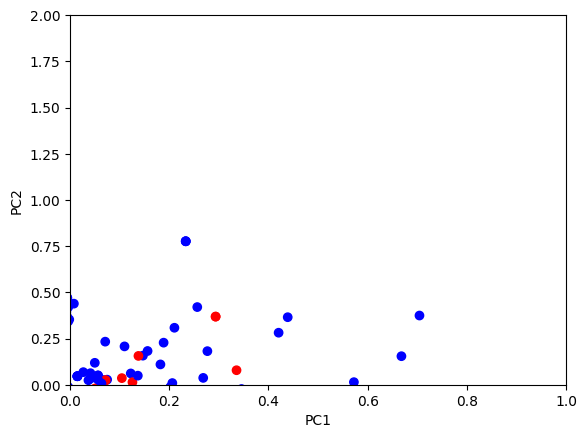

In [17]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Category'].map({'ham': 'blue', 'spam': 'red'}))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

## Hierarchical Clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Vectorize the text messages using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Message'])

In [20]:
# Perform hierarchical clustering
linked = linkage(X.toarray(), 'ward')

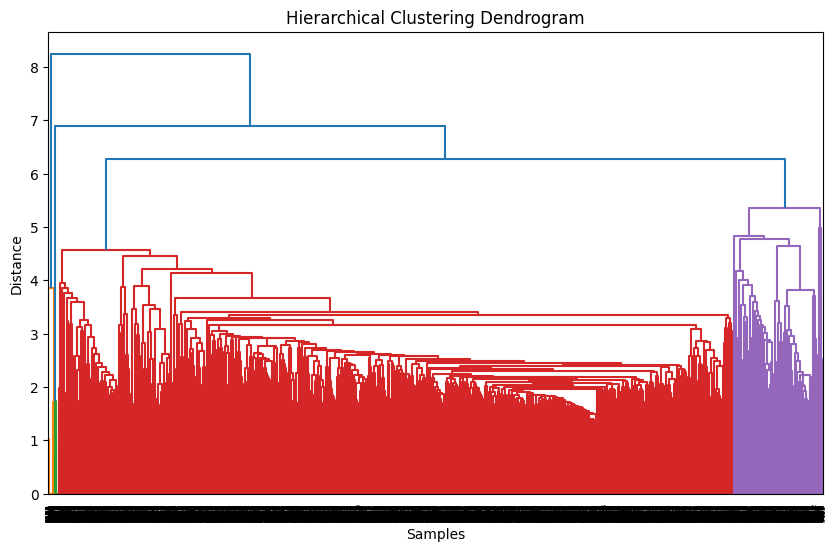

In [21]:
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()